In [1]:
import re 
import tensorflow as tf 
tf.random.set_seed(0) 

with open('wiki_space_tokenizer.txt', mode='r', encoding='utf-8') as f: 
    wiki_contents = f.read()
wiki_contents = wiki_contents.split("\n")

In [2]:
len(wiki_contents)

1806748

In [3]:
wiki_contents = wiki_contents[:1000]

In [4]:
text = list() 
maxlen = 13
tmp_content = ''
for content in wiki_contents: 
    content = content.strip()
    content = re.sub(r'\([^)]*\)', '', content)
    content = content.lower()
    if not content: continue 
    if content[-1] == '.':
        if len(tmp_content) > 0: tmp_content = tmp_content + '\n' + content 
        else: tmp_content = content 
    else:
        if len(tmp_content) > maxlen: 
            text.append(tmp_content+'E') 
        tmp_content = ''    

In [5]:
len(text), text[:2]

(110,
 ['제임스 얼 "지미" 카터 주니어는 민주당 출신 미국 39번째 대통령이다.\n지미 카터는 조지아 주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" 로 알려졌다.\n1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아 주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.\n1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.\n카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.\n카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.\n그러나 이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다. 1979년 백악관에서 양국 간의 평화조약으로 이끌어졌다. 또한 소련과 제2차 전략 무기 제한 협상에 조인했다.\n카터는 1970년대 후반 당시 대한민국 등 인권 후진국의 국민들의 인권을 지키기 위해 노력했으며, 취임 이후 계속해서 도덕정치를 내세웠다.\n그러나 주 이란 미국 대사관 인질 사건에서 인질 구출 실패를 이유로 1980년 대통령 선거에서 공화당의 로널드 레이건 후보에게 져 결국 재선에 실패했다. 또한 임기 말기에 터진 소련의 아프가니스탄 침공 사건으로 인해 1980년 하계 올림픽에 반공국가들의 보이콧을 내세웠다.\n지미 카터는 대한민국과의 관계에서도 중요한 영향을 미쳤던 대통령 중 하나다. 인권 문제와 주한미군 철수 문제로 한때 한미 관계

In [6]:
sum([len(elem) for elem in text])

142403

In [7]:
total_text = ''.join(text) 

In [8]:
chars = sorted(list(set(total_text)))
char_size = len(chars)
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
print('total chars: ', char_size)

total chars:  1109


In [9]:
sentences = []
next_chars = []
for content in text: 
    for i in range(0, len(content) - maxlen, 1):
        sentences.append([char_indices[elem] for elem in content[i: i + maxlen]])
        next_chars.append(char_indices[content[i + maxlen]])
print("sequences length: ", len(sentences))

sequences length:  140973


In [10]:
from tensorflow.keras.utils import to_categorical 
import numpy as np
data_X = np.array(sentences) 
data_Y = np.array(next_chars) 
data_Y = to_categorical(data_Y)
y_size = data_Y.shape[1]

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim=char_size, 
                   output_dim=200, 
                   input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(y_size, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
import time 
start_time = time.time() 

history = model.fit(data_X, data_Y,
          batch_size=256,
          epochs=400, 
          verbose=2)

end_time = time.time()

Train on 140973 samples
Epoch 1/400
140973/140973 - 10s - loss: 4.7611 - accuracy: 0.2245
Epoch 2/400
140973/140973 - 7s - loss: 4.1474 - accuracy: 0.2643
Epoch 3/400
140973/140973 - 7s - loss: 3.8411 - accuracy: 0.2888
Epoch 4/400
140973/140973 - 7s - loss: 3.6653 - accuracy: 0.3048
Epoch 5/400
140973/140973 - 7s - loss: 3.5396 - accuracy: 0.3187
Epoch 6/400
140973/140973 - 7s - loss: 3.4373 - accuracy: 0.3314
Epoch 7/400
140973/140973 - 7s - loss: 3.3499 - accuracy: 0.3420
Epoch 8/400
140973/140973 - 7s - loss: 3.2738 - accuracy: 0.3528
Epoch 9/400
140973/140973 - 7s - loss: 3.2057 - accuracy: 0.3635
Epoch 10/400
140973/140973 - 7s - loss: 3.1454 - accuracy: 0.3701
Epoch 11/400
140973/140973 - 7s - loss: 3.0924 - accuracy: 0.3767
Epoch 12/400
140973/140973 - 7s - loss: 3.0461 - accuracy: 0.3810
Epoch 13/400
140973/140973 - 7s - loss: 3.0042 - accuracy: 0.3859
Epoch 14/400
140973/140973 - 7s - loss: 2.9664 - accuracy: 0.3903
Epoch 15/400
140973/140973 - 7s - loss: 2.9323 - accuracy: 0

Epoch 125/400
140973/140973 - 7s - loss: 1.9615 - accuracy: 0.5568
Epoch 126/400
140973/140973 - 7s - loss: 1.9585 - accuracy: 0.5567
Epoch 127/400
140973/140973 - 8s - loss: 1.9567 - accuracy: 0.5578
Epoch 128/400
140973/140973 - 8s - loss: 1.9514 - accuracy: 0.5586
Epoch 129/400
140973/140973 - 8s - loss: 1.9489 - accuracy: 0.5592
Epoch 130/400
140973/140973 - 8s - loss: 1.9488 - accuracy: 0.5596
Epoch 131/400
140973/140973 - 8s - loss: 1.9451 - accuracy: 0.5602
Epoch 132/400
140973/140973 - 8s - loss: 1.9432 - accuracy: 0.5604
Epoch 133/400
140973/140973 - 8s - loss: 1.9391 - accuracy: 0.5611
Epoch 134/400
140973/140973 - 8s - loss: 1.9355 - accuracy: 0.5622
Epoch 135/400
140973/140973 - 8s - loss: 1.9335 - accuracy: 0.5622
Epoch 136/400
140973/140973 - 8s - loss: 1.9311 - accuracy: 0.5626
Epoch 137/400
140973/140973 - 8s - loss: 1.9266 - accuracy: 0.5634
Epoch 138/400
140973/140973 - 8s - loss: 1.9254 - accuracy: 0.5644
Epoch 139/400
140973/140973 - 7s - loss: 1.9262 - accuracy: 0.

Epoch 248/400
140973/140973 - 8s - loss: 1.7597 - accuracy: 0.5957
Epoch 249/400
140973/140973 - 8s - loss: 1.7609 - accuracy: 0.5956
Epoch 250/400
140973/140973 - 8s - loss: 1.7601 - accuracy: 0.5952
Epoch 251/400
140973/140973 - 8s - loss: 1.7653 - accuracy: 0.5938
Epoch 252/400
140973/140973 - 8s - loss: 1.7587 - accuracy: 0.5953
Epoch 253/400
140973/140973 - 7s - loss: 1.7608 - accuracy: 0.5945
Epoch 254/400
140973/140973 - 7s - loss: 1.7564 - accuracy: 0.5959
Epoch 255/400
140973/140973 - 7s - loss: 1.7542 - accuracy: 0.5974
Epoch 256/400
140973/140973 - 7s - loss: 1.7536 - accuracy: 0.5972
Epoch 257/400
140973/140973 - 8s - loss: 1.7508 - accuracy: 0.5979
Epoch 258/400
140973/140973 - 8s - loss: 1.7559 - accuracy: 0.5957
Epoch 259/400
140973/140973 - 8s - loss: 1.7545 - accuracy: 0.5971
Epoch 260/400
140973/140973 - 8s - loss: 1.7588 - accuracy: 0.5944
Epoch 261/400
140973/140973 - 8s - loss: 1.7581 - accuracy: 0.5957
Epoch 262/400
140973/140973 - 8s - loss: 1.7477 - accuracy: 0.

Epoch 371/400
140973/140973 - 8s - loss: 1.6966 - accuracy: 0.6076
Epoch 372/400
140973/140973 - 8s - loss: 1.6974 - accuracy: 0.6069
Epoch 373/400
140973/140973 - 8s - loss: 1.6974 - accuracy: 0.6068
Epoch 374/400
140973/140973 - 8s - loss: 1.6958 - accuracy: 0.6069
Epoch 375/400
140973/140973 - 8s - loss: 1.7034 - accuracy: 0.6055
Epoch 376/400
140973/140973 - 8s - loss: 1.7059 - accuracy: 0.6045
Epoch 377/400
140973/140973 - 8s - loss: 1.6912 - accuracy: 0.6092
Epoch 378/400
140973/140973 - 8s - loss: 1.6954 - accuracy: 0.6075
Epoch 379/400
140973/140973 - 8s - loss: 1.6896 - accuracy: 0.6082
Epoch 380/400
140973/140973 - 7s - loss: 1.6991 - accuracy: 0.6064
Epoch 381/400
140973/140973 - 8s - loss: 1.6920 - accuracy: 0.6084
Epoch 382/400
140973/140973 - 8s - loss: 1.6918 - accuracy: 0.6084
Epoch 383/400
140973/140973 - 8s - loss: 1.6903 - accuracy: 0.6081
Epoch 384/400
140973/140973 - 8s - loss: 1.7032 - accuracy: 0.6045
Epoch 385/400
140973/140973 - 8s - loss: 1.6944 - accuracy: 0.

In [14]:
"Time: {}".format(end_time-start_time)

'Time: 3073.936546564102'

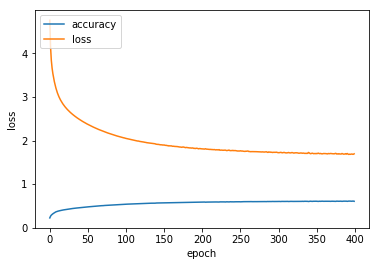

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [16]:
import sys
from nltk.translate import bleu_score

def text_generation(model):
    text_idx = 0
    current_text = text[text_idx]
    generated = ''
    sentence = current_text[:maxlen]
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(200): 
        x_pred = list()
        for idx, char in enumerate(sentence): 
            x_pred.append([char_indices[char]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_char = indices_char[next_idx]
        sentence = sentence[1:] + next_char
        sys.stdout.write(next_char)
        sys.stdout.flush()
        if next_char == 'E': break 
    print()

def text_generation_res(model):
    text_idx = 0
    current_text = text[text_idx]
    generated = ''
    sentence = current_text[:maxlen]
    
    for i in range(min(200, len(current_text))): 
        x_pred = list()
        for idx, char in enumerate(sentence): 
            x_pred.append([char_indices[char]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_char = indices_char[next_idx]
        sentence = sentence[1:] + next_char
        generated += next_char
        if next_char == 'E': break
        
    return generated, text_idx

def get_BLEU_score(model): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_text) 
    original_text = text[text_idx] 
    original_text = original_text[:pred_len]

    original_text = original_text.split()
    predict_text = predict_text.split() 
    BLEUscore = bleu_score.sentence_bleu([original_text], predict_text)
    return BLEUscore

In [17]:
text_generation(model)

----- Generating with seed: "제임스 얼 "지미" 카터"
제임스 얼 "지미" 카터 욕구를 지냈다.
1967년 맥스웰은 민주당 후보로 인해 10월에는 데이터 문재인 비판일 후보 세계 대변공화학에서 다음과 같다.
물리 화합물을 위해 여러 역시 함수의 때문에 위튼 정치 구속 대통령 서·태조사에서 "대통령 교전 대통령 교전 조직의 이 전시와 민주당 후보 세계 수집에서는 19세기 소분을 이룬다. 그러나 한미 ftac 안상 사건을 합은 찢어버리,


In [18]:
get_BLEU_score(model) 

C:\Users\dwpar\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\dwpar\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\dwpar\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contain

6.885877678021066e-232

In [19]:
from rouge import Rouge

evalutaor = Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                           max_n=4,
                           apply_avg='Avg',
                           alpha=0.5,
                           weight_factor=1.2)

In [20]:
def get_ROUGE_score(model, evaluator): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_text) 
    original_text = text[text_idx] 
    score = evalutaor.get_scores(original_text, predict_text)
    return score
get_ROUGE_score(model, evalutaor)

{'rouge-3': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-4': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-w': {'f': 0.0, 'p': 0.0, 'r': 0.0}}